**Movie Rating prediction**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as mpl
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split

In [ ]:
Movies_Details = pd.read_csv('Movie_rating.csv',encoding='latin1')
Movies_Details.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
Movies_Details.shape

(15509, 10)

In [ ]:
Movies_Details.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [ ]:
Movies_Details.columns
Movies_Details.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [ ]:
Movies_Details.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [ ]:
Movies_Details.dropna(inplace = True)

In [ ]:
Movies_Details.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,(2004),96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,(2016),120 min,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,(1991),161 min,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,(2012),166 min,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


In [ ]:
Movies_Details.drop_duplicates(subset='Name',inplace=True)
Movies_Details.duplicated().value_counts()

False    5385
Name: count, dtype: int64

In [ ]:
Movies_Details.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,(2004),96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,(2016),120 min,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,(1991),161 min,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,(2012),166 min,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh


In [ ]:
print("Number of rows:", Movies_Details.shape[0])
print("Number of columns:", Movies_Details.shape[1])

Number of rows: 5385
Number of columns: 10


In [ ]:
missing_count = Movies_Details.isnull().sum().sort_values(ascending=False)
missing_percent = (round(Movies_Details.isnull().sum()/Movies_Details.isnull().count(), 4)*100).sort_values(ascending=False)
missing_data = pd.concat([missing_count, missing_percent],
                       axis=1,
                       keys=['missing_count', 'missing_percent'])
missing_data

,missing_count,missing_percent
Name,0,0.0
Year,0,0.0
Duration,0,0.0
Genre,0,0.0
Rating,0,0.0
Votes,0,0.0
Director,0,0.0
Actor 1,0,0.0
Actor 2,0,0.0
Actor 3,0,0.0


In [ ]:
Movies_Details["Year"].head()

1    (2019)
3    (2019)
5    (1997)
6    (2005)
8    (2012)
Name: Year, dtype: object

In [ ]:
Movies_Details["Genre"].head()

1                        Drama
3              Comedy, Romance
5       Comedy, Drama, Musical
6          Drama, Romance, War
8    Horror, Mystery, Thriller
Name: Genre, dtype: object

In [ ]:
Movies_Details['Year'] = Movies_Details['Year'].apply(lambda x: x.split(')')[0])
year_lst = []
for val in Movies_Details['Year']:
    if len(val.split('(')) == 1:
        year_lst.append(val.split('(')[0])
    elif len(val.split('(')) > 1:
        year_lst.append(val.split('(')[1])
Movies_Details['Year'] = year_lst

In [ ]:
n=len(year_lst)
for i in range(n):
  print(year_lst[i],end=",")

2019,2019,1997,2005,2012,2014,2004,2016,1991,2012,2018,2010,1958,2017,2009,2005,1993,2002,2014,2004,2008,2016,2012,2018,1994,2007,2019,2017,2012,2003,2014,2018,1998,2017,2018,1979,2019,2002,1974,2014,2012,2003,2019,2009,2018,2015,2015,2006,1981,2020,2019,1985,2013,2019,2011,2016,2012,2012,1974,2011,2014,2007,2005,1988,2016,2006,2011,1987,2019,2019,2009,2021,2003,2017,2009,2019,2005,2016,2017,2016,2005,2010,2016,2020,2017,2019,2013,2013,2016,2005,2019,2008,1999,2018,2009,1973,2017,2016,2004,1968,2018,1982,1977,2019,1982,2013,1950,1968,1991,1969,1993,2009,1977,2016,1977,1948,1994,1987,1990,1993,1988,1989,2001,2009,2000,1953,1978,1993,1987,1963,2003,1990,1985,1992,1976,2000,1991,1984,1988,1990,1984,1993,2007,1968,1986,1988,1989,1989,1989,1979,1966,1990,1997,1975,1980,2012,2001,2007,2018,2001,2008,1967,1982,1984,1970,2004,2003,1980,1975,1985,1952,2019,1993,1972,1970,1994,2009,1971,1976,1974,1977,1964,2002,1980,1981,2003,1985,1997,2011,1974,1954,1962,2007,1999,1957,2010,1962,2005,1977,1990,

In [ ]:
genres = Movies_Details['Genre'].str.split(', ', expand=True)

In [ ]:
genre_count = {}
for genre in genres.values.flatten():
    if genre is not None:
        if genre in genre_count:
            genre_count[genre] += 1
        else:
            genre_count[genre] = 1

genereCounts = {genre: count for genre, count in sorted(genre_count.items())}
for genre, count in genereCounts.items():
    print(f"{genre}: {count}")

Action: 1574
Adventure: 266
Animation: 39
Biography: 112
Comedy: 1294
Crime: 826
Documentary: 48
Drama: 3608
Family: 401
Fantasy: 141
History: 98
Horror: 189
Music: 52
Musical: 391
Mystery: 283
News: 1
Romance: 1302
Sci-Fi: 32
Sport: 40
Thriller: 637
War: 32
Western: 1


In [ ]:
genre_Pie = Movies_Details['Genre'].value_counts()
genrePie = pd.DataFrame(list(genre_Pie.items()))
genrePie = genrePie.rename(columns={0: 'Genre', 1: 'Count'})
genrePie.head(11)

,Genre,Count
0,Drama,810
1,"Drama, Romance",309
2,"Action, Crime, Drama",304
3,"Comedy, Drama",203
4,"Action, Drama",194
5,Comedy,185
6,"Comedy, Drama, Romance",181
7,"Drama, Family",153
8,Action,151
9,Romance,123


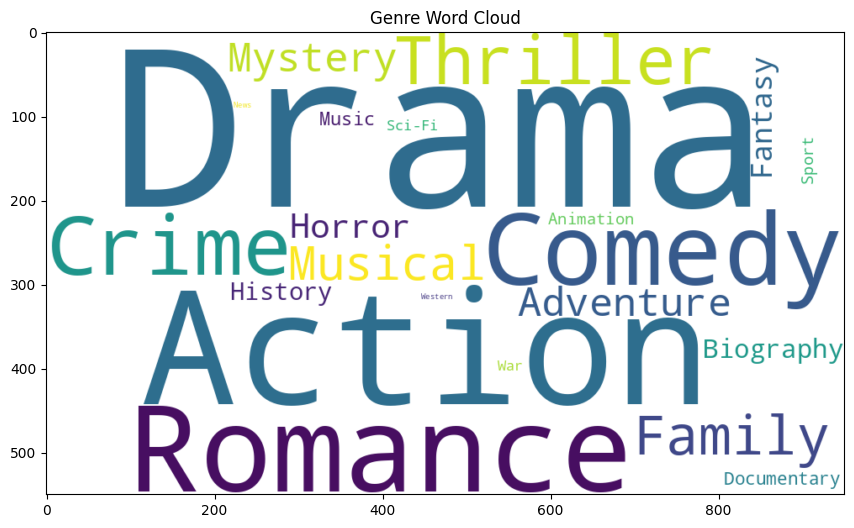

In [ ]:
genre_counts = Movies_Details['Genre'].str.split(', ', expand=True).stack().value_counts()
wordcloud = WordCloud(width=950, height=550, background_color='white').generate_from_frequencies(genre_counts)
mpl.figure(figsize=(16, 6))
mpl.imshow(wordcloud, interpolation='bilinear')
mpl.axis('on')
mpl.title('Genre Word Cloud')
mpl.show()

In [ ]:
print(Movies_Details['Votes'].dtype)
Movies_Details['Votes'] = Movies_Details['Votes'].astype(str)
print(Movies_Details['Votes'].dtype)
Movies_Details['Votes'] = Movies_Details['Votes'].str.replace(',', '').astype(int)
print(Movies_Details['Votes'].dtype)

object
object
int64


In [ ]:
Movies_Details[['Rating', 'Votes']].describe()

,Rating,Votes
count,5385.000000,5385.000000
mean,5.910306,2704.462024
std,1.381041,13895.286599
min,1.100000,5.000000
25%,5.000000,30.000000
50%,6.100000,129.000000
75%,6.900000,928.000000
max,10.000000,591417.000000


In [ ]:
print(Movies_Details["Director"].nunique())
directors = Movies_Details["Director"].value_counts()
directors.head(11)

2389


Director
David Dhawan            37
Mahesh Bhatt            34
Hrishikesh Mukherjee    33
Shakti Samanta          32
Ram Gopal Varma         31
Vikram Bhatt            24
Priyadarshan            23
Basu Chatterjee         22
Shyam Benegal           22
Yash Chopra             21
K. Bapaiah              20
Name: count, dtype: int64

In [ ]:
Movies_Details.shape

(5385, 10)

In [ ]:
movie_update = Movies_Details.drop(['Name'], axis=1)
X = movie_update.drop('Rating', axis=1)
Y = movie_update['Rating']


In [ ]:
X.head()

,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109 min,Drama,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,2019,110 min,"Comedy, Romance",35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,1997,147 min,"Comedy, Drama, Musical",827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,2005,142 min,"Drama, Romance, War",1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,2012,82 min,"Horror, Mystery, Thriller",326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


<ipython-input-27-194b8fc5b4d1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.barplot(x=directors.head(20).index, y=directors.head(20).values, palette='viridis')


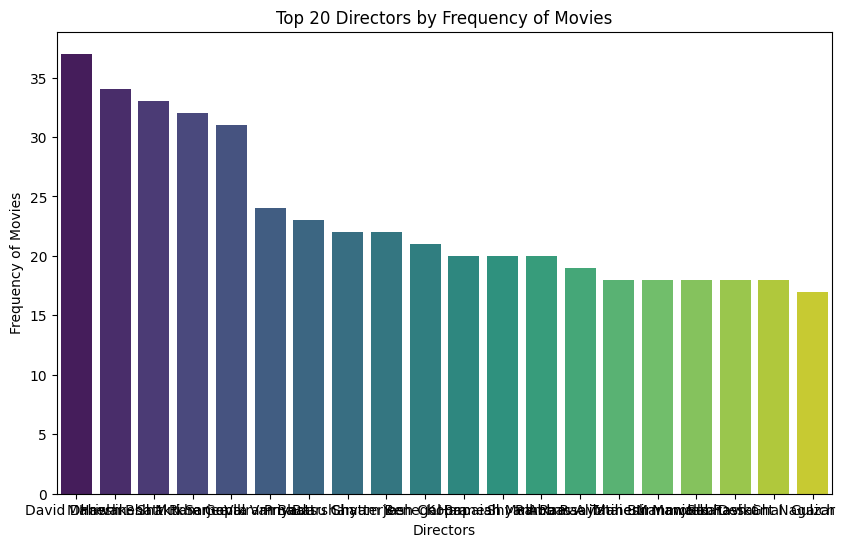

In [ ]:
mpl.figure(figsize=(10, 6))
ax = sb.barplot(x=directors.head(20).index, y=directors.head(20).values, palette='viridis')
ax.set_xlabel('Directors')
ax.set_ylabel('Frequency of Movies')
ax.set_title('Top 20 Directors by Frequency of Movies')
mpl.show(11)

In [ ]:
actors = pd.concat([Movies_Details['Actor 1'], Movies_Details['Actor 2'], Movies_Details['Actor 3']]).dropna().value_counts()
actors.head(11)

Mithun Chakraborty    139
Amitabh Bachchan      138
Dharmendra            136
Ashok Kumar           118
Akshay Kumar          111
Jeetendra             110
Shashi Kapoor         109
Sanjay Dutt            96
Rekha                  86
Rishi Kapoor           83
Naseeruddin Shah       83
Name: count, dtype: int64

<ipython-input-29-13ef07bf09be>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sb.barplot(x=actors.head(20).index, y=actors.head(20).values, palette='viridis')
<ipython-input-29-13ef07bf09be>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


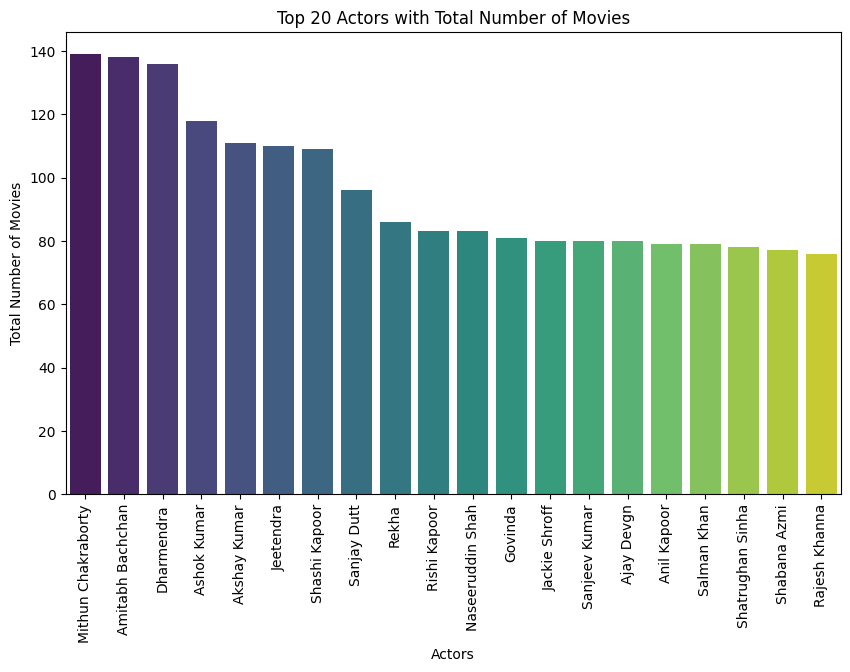

In [ ]:
mpl.figure(figsize=(10, 6))
ax = sb.barplot(x=actors.head(20).index, y=actors.head(20).values, palette='viridis')
ax.set_xlabel('Actors')
ax.set_ylabel('Total Number of Movies')
ax.set_title('Top 20 Actors with Total Number of Movies')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
mpl.show()

In [ ]:
Movies_Details["Actor"] = Movies_Details['Actor 1'] + ', ' + Movies_Details['Actor 2'] + ', ' + Movies_Details['Actor 3']
Movies_Details["Directors"] = Movies_Details['Director'].astype('category').cat.codes
Movies_Details["Genres"] = Movies_Details['Genre'].astype('category').cat.codes
Movies_Details["Actors"] = Movies_Details['Actor'].astype('category').cat.codes

In [ ]:
Q1 = Movies_Details['Actors'].quantile(0.25)
Q3 = Movies_Details['Actors'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
movie_file = Movies_Details[(Movies_Details['Actors'] >= lower_bound) & (Movies_Details['Actors'] <= upper_bound)]
movie_file.head(11)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",621,226,3671
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1317,182,3158
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1508,155,1052
6,...Yahaan,2005,142 min,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",2014,285,1962
8,?: A Question Mark,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",134,315,5296
9,@Andheri,2014,116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,"Augustine, Fathima Babu, Byon",397,36,913
10,1:1.6 An Ode to Lost Love,2004,96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,"Rati Agnihotri, Gulshan Grover, Atul Kulkarni",1067,226,3676
11,1:13:7 Ek Tera Saath,2016,120 min,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,"Pankaj Berry, Anubhav Dhir, Hritu Dudani",263,311,3047
12,100 Days,1991,161 min,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey,"Jackie Shroff, Madhuri Dixit, Javed Jaffrey",1354,318,1783
13,100% Love,2012,166 min,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh,"Jeet, Koyel Mallick, Sujoy Ghosh",1484,157,1861


In [ ]:
Movies_Details['Duration'] = Movies_Details['Duration'].str.extract('(\d+)')
Movies_Details['Duration'] = pd.to_numeric(Movies_Details['Duration'], errors='coerce')

In [ ]:
Q1 = Movies_Details['Rating'].quantile(0.25)
Q3 = Movies_Details['Rating'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
Movies_Details = Movies_Details[(Movies_Details['Rating'] >= lower_bound) & (Movies_Details['Rating'] <= upper_bound)]
Movies_Details.head(16)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",621,226,3671
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1317,182,3158
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1508,155,1052
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",2014,285,1962
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",134,315,5296
9,@Andheri,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,"Augustine, Fathima Babu, Byon",397,36,913
10,1:1.6 An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,"Rati Agnihotri, Gulshan Grover, Atul Kulkarni",1067,226,3676
11,1:13:7 Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,"Pankaj Berry, Anubhav Dhir, Hritu Dudani",263,311,3047
12,100 Days,1991,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey,"Jackie Shroff, Madhuri Dixit, Javed Jaffrey",1354,318,1783
13,100% Love,2012,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh,"Jeet, Koyel Mallick, Sujoy Ghosh",1484,157,1861


In [ ]:
Q1 = Movies_Details['Duration'].quantile(0.25)
Q3 = Movies_Details['Duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = Movies_Details[(Movies_Details['Duration'] >= lower_bound) & (Movies_Details['Duration'] <= upper_bound)]
df.head(11)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",621,226,3671
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1317,182,3158
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1508,155,1052
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",2014,285,1962
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",134,315,5296
9,@Andheri,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,"Augustine, Fathima Babu, Byon",397,36,913
10,1:1.6 An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,"Rati Agnihotri, Gulshan Grover, Atul Kulkarni",1067,226,3676
11,1:13:7 Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,"Pankaj Berry, Anubhav Dhir, Hritu Dudani",263,311,3047
12,100 Days,1991,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey,"Jackie Shroff, Madhuri Dixit, Javed Jaffrey",1354,318,1783
13,100% Love,2012,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh,"Jeet, Koyel Mallick, Sujoy Ghosh",1484,157,1861


In [ ]:
Movies_Details["Actor"] = Movies_Details['Actor 1'] + ', ' + Movies_Details['Actor 2'] + ', ' + Movies_Details['Actor 3']
Movies_Details["Directors"] = Movies_Details['Director'].astype('category').cat.codes
Movies_Details["Genres"] = Movies_Details['Genre'].astype('category').cat.codes
Movies_Details["Actors"] = Movies_Details['Actor'].astype('category').cat.codes

In [ ]:
Movies_Details.head(11)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",620,226,3655
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1315,182,3142
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1504,155,1046
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",2006,285,1952
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",134,315,5270
9,@Andheri,2014,116,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,"Augustine, Fathima Babu, Byon",397,36,907
10,1:1.6 An Ode to Lost Love,2004,96,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,"Rati Agnihotri, Gulshan Grover, Atul Kulkarni",1066,226,3660
11,1:13:7 Ek Tera Saath,2016,120,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,"Pankaj Berry, Anubhav Dhir, Hritu Dudani",263,311,3031
12,100 Days,1991,161,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey,"Jackie Shroff, Madhuri Dixit, Javed Jaffrey",1352,318,1774
13,100% Love,2012,166,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh,"Jeet, Koyel Mallick, Sujoy Ghosh",1480,157,1851


In [ ]:
Q1 = movie_file['Genres'].quantile(0.25)
Q3 = movie_file['Genres'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
movie_file = movie_file[(movie_file['Genres'] >= lower_bound) & (movie_file['Genres'] <= upper_bound)]
movie_file.head(11)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",621,226,3671
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,"Prateik, Ishita Raj, Siddhant Kapoor",1317,182,3158
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1508,155,1052
6,...Yahaan,2005,142 min,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",2014,285,1962
8,?: A Question Mark,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",134,315,5296
9,@Andheri,2014,116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,"Augustine, Fathima Babu, Byon",397,36,913
10,1:1.6 An Ode to Lost Love,2004,96 min,Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,"Rati Agnihotri, Gulshan Grover, Atul Kulkarni",1067,226,3676
11,1:13:7 Ek Tera Saath,2016,120 min,Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,"Pankaj Berry, Anubhav Dhir, Hritu Dudani",263,311,3047
12,100 Days,1991,161 min,"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey,"Jackie Shroff, Madhuri Dixit, Javed Jaffrey",1354,318,1783
13,100% Love,2012,166 min,"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh,"Jeet, Koyel Mallick, Sujoy Ghosh",1484,157,1861


In [ ]:
Input = Movies_Details.drop(['Name', 'Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Actor'], axis=1)
Output = Movies_Details['Rating']

In [ ]:
Input.head(16)

,Year,Duration,Votes,Directors,Genres,Actors
1,2019,109,8,620,226,3655
3,2019,110,35,1315,182,3142
5,1997,147,827,1504,155,1046
6,2005,142,1086,2006,285,1952
8,2012,82,326,134,315,5270
9,2014,116,11,397,36,907
10,2004,96,17,1066,226,3660
11,2016,120,59,263,311,3031
12,1991,161,983,1352,318,1774
13,2012,166,512,1480,157,1851


In [ ]:
Output.head(16)

1     7.0
3     4.4
5     4.7
6     7.4
8     5.6
9     4.0
10    6.2
11    5.9
12    6.5
13    5.7
15    7.4
18    6.3
21    7.2
25    6.6
28    7.3
30    7.1
Name: Rating, dtype: float64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(Input, Output, test_size = 0.2, random_state = 1)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score as score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
def evaluate_model(y_true, y_pred, model_name):
    print("Model: ", model_name)
    print("Accuracy = {:0.2f}%".format(score(y_true, y_pred)*1000))
    print("Mean Squared Error = {:0.2f}\n".format(mean_squared_error(y_true, y_pred, squared=False)))
    return round(score(y_true, y_pred)*1000, 2)

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    print("Model: ", model_name)
    print("Accuracy = {:0.2f}%".format(score(y_true, y_pred)*1000))
    print("Mean Squared Error = {:0.2f}\n".format(mean_squared_error(y_true, y_pred, squared=False)))
    return round(score(y_true, y_pred)*1000, 2)

In [ ]:
LR = LinearRegression()
LR.fit(x_train, y_train)
lr_preds = LR.predict(x_test)

RFR = RandomForestRegressor(n_estimators=100, random_state=1)
RFR.fit(x_train, y_train)
rf_preds = RFR.predict(x_test)

DTR = DecisionTreeRegressor(random_state=1)
DTR.fit(x_train, y_train)
dt_preds = DTR.predict(x_test)


GBR = GradientBoostingRegressor(n_estimators=100, random_state=60)
GBR.fit(x_train, y_train)
gb_preds = GBR.predict(x_test)

KNR = KNeighborsRegressor(n_neighbors=5)
KNR.fit(x_train, y_train)
knn_preds = KNR.predict(x_test)

In [ ]:
LRScore = evaluate_model(y_test, lr_preds, "LINEAR REGRESSION")
RFScore = evaluate_model(y_test, rf_preds, "RANDOM FOREST")
DTScore = evaluate_model(y_test, dt_preds, "DECEISION TREE")
KNNScore = evaluate_model(y_test, knn_preds, "K NEAREST NEIGHBORS")

Model:  LINEAR REGRESSION
Accuracy = 98.79%
Mean Squared Error = 1.31

Model:  RANDOM FOREST
Accuracy = 365.36%
Mean Squared Error = 1.10

Model:  DECEISION TREE
Accuracy = -196.92%
Mean Squared Error = 1.51

Model:  K NEAREST NEIGHBORS
Accuracy = -7.79%
Mean Squared Error = 1.39



In [ ]:
models = pd.DataFrame(
    {
        "MODELS": ["Linear Regression", "Random Forest", "Decision Tree", "K Nearest Neighbors"],
        "SCORES": [LRScore, RFScore, DTScore, KNNScore]
    }
)
models.sort_values(by='SCORES', ascending=False)

,MODELS,SCORES
1,Random Forest,365.36
0,Linear Regression,98.79
3,K Nearest Neighbors,-7.79
2,Decision Tree,-196.92
